# "Human or Robot" 
## Predicting Auction Fraud

On an auction website, human bidders are becoming increasingly frustrated with their inability to win auctions vs. their software-controlled counterparts. As a result, usage from the site's core customer base is plummeting. In order to rebuild customer happiness, the site owners need to eliminate computer generated bidding from their auctions.

The goal of this project is to identify online auction bids that are placed by "robots", thus helping the site owners easily flag these users for removal from their site to prevent unfair auction activity.

<img src="../images/robots-greeting.png" width="500">

## PRE PROCESSING AND MODELING
1. Models
    - Logistic Regression
    - Random Forest
    - Decision Trees
    
    
2. Evaluation: Classification Metrics
    - Confusion Matrix
        - TP (true positive) 
        - FN (false negative)
        - FP (false positive)
        - TN (true negative)
        
    - Main metrics
        - Accuracy
        - Precision
        - Recall/ Sensitivity
        - Specificity
        - F1 score
        
    - ROC curve
        - Plot of Recall vs Specificity 
            - same as TPR (true positive rate) vs FPR (false positive rate)
        
    - AUC (area under the curve)
     
     
3. Conclusion

#### INTERPRETATION OF METRICS

- **Accuracy:** Overall performance of the model.
- **Precision:** How accurate the positive predictions are.
- **Recall/ Sensitivity:** Coverage of actual positive sample.
- **Specificity:** Coverage of actual negative sample.
- **F1 Score:** Hybrid metric useful for unbalanced classes.

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeClassifier

from IPython.display import display
import matplotlib.ticker as ticker
import pylab as pl
import math

# Compare Algorithms
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from scipy import interp
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RepeatedStratifiedKFold
from io import StringIO  

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=25,25

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load df
df = pd.read_csv('../data/features-outcome-df')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   outcome                          1984 non-null   float64
 1   ip_bids_per_user                 1984 non-null   float64
 2   url_bids_per_user                1984 non-null   float64
 3   bids_per_user                    1984 non-null   float64
 4   url_per_user                     1984 non-null   float64
 5   auction_per_user                 1984 non-null   float64
 6   ip_per_user                      1984 non-null   float64
 7   avg_bids_per_user                1984 non-null   float64
 8   median_bids_per_user             1984 non-null   float64
 9   avg_country_per_user             1984 non-null   float64
 10  median_country_per_user          1984 non-null   float64
 11  avg_auction_per_country_user     1984 non-null   float64
 12  median_auction_per_c

In [3]:
# # visualizing the distribution of some variables
# sns.boxplot(y="bids_per_coutry", x= "outcome", data=df)
# plt.show()

In [4]:
df.head()

,outcome,ip_bids_per_user,url_bids_per_user,bids_per_user,url_per_user,auction_per_user,ip_per_user,avg_bids_per_user,median_bids_per_user,avg_country_per_user,...,auto parts,books and music,clothing,computers,furniture,home goods,jewelry,mobile,office equipment,sporting goods
0,0.0,0.833333,0.041667,24.0,1.0,18.0,20.0,1.333333,1.0,1.166667,...,0,0,0,0,0,24,0,0,0,0
1,0.0,1.000000,0.666667,3.0,2.0,1.0,3.0,3.000000,3.0,1.000000,...,0,0,0,0,0,0,0,0,3,0
2,0.0,1.000000,0.500000,4.0,2.0,4.0,4.0,1.000000,1.0,1.000000,...,0,0,0,0,0,0,0,0,0,4
3,0.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000,...,0,1,0,0,0,0,0,0,0,0
4,0.0,0.793548,0.587097,155.0,91.0,23.0,123.0,6.739130,2.0,1.000000,...,0,0,0,0,0,0,0,0,155,0


In [5]:
df.columns

Index(['outcome', 'ip_bids_per_user', 'url_bids_per_user', 'bids_per_user',
       'url_per_user', 'auction_per_user', 'ip_per_user', 'avg_bids_per_user',
       'median_bids_per_user', 'avg_country_per_user',
       'median_country_per_user', 'avg_auction_per_country_user',
       'median_auction_per_country_user', 'avg_url_per_device_user',
       'median_url_per_device_user', 'avg_ip_per_device_user',
       'median_ip_per_device_user', 'auto parts', 'books and music',
       'clothing', 'computers', 'furniture', 'home goods', 'jewelry', 'mobile',
       'office equipment', 'sporting goods'],
      dtype='object')

------------

### Declare Response and Explanatory Variables

In [6]:
# declare response variable Y
y = df['outcome']

# keep explanatory variables X
X = df.drop('outcome', axis=1)

print(X.shape, y.shape)

(1984, 26) (1984,)


- Response variable:

In [7]:
from collections import Counter

# summarize observations by class label
counter = Counter(y)

print(counter)

Counter({0.0: 1881, 1.0: 103})


**NOTE:** We have an imbalanced classification problem which is common in fraud detections as this is. Specialized techniques may be used to change the composition of samples in the training dataset by undersampling the majority class or oversampling the minority class.

We can use:
- Random Undersampling.
- SMOTE Oversampling.

Specialized modeling algorithms may be used that pay more attention to the minority class when fitting the model on the training dataset, such as cost-sensitive machine learning algorithms.

Examples include:
- Cost-sensitive Logistic Regression.
- Cost-sensitive Decision Trees.
- Cost-sensitive Support Vector Machines.

**For now, we will keep the distribution as it is and evaluate how the models perform.**

-------------

### Test Train Split

In [8]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, random_state = 42)

# Check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right
print('X_train: ', X_train.shape, 'y_train: ', y_train.shape, 'X_test :' ,X_test.shape,
      'y_test: ', y_test.shape)

X_train:  (1587, 26) y_train:  (1587,) X_test : (397, 26) y_test:  (397,)


In [9]:
# summarize observations by class label for y_test
counter1 = Counter(y_test)

print(counter1)

Counter({0.0: 374, 1.0: 23})


-----------

### What is most promissing model?
- Based on the boxplots below, it seems that we'll get good results with Random Forest Classifier. Let's create and train the models now, and see if this holds true.

LR: 0.940521 (0.009290)
CART: 0.938507 (0.001927)
RF: 0.960679 (0.010128)


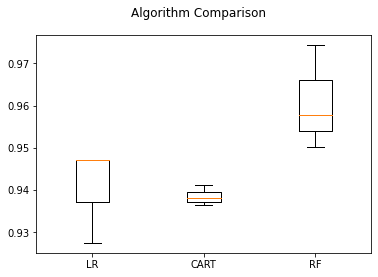

In [10]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=3)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Models 

# 1. Logistic Regressiom

In [11]:
# instantiate model
logistic_regression = LogisticRegression(random_state=0, solver="liblinear")

# fit the model
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test) 

In [12]:
print("Logistics Regression model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1.0))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0.0))


Logistics Regression model
Accuracy: 0.9420654911838791
Balanced accuracy: 0.5408044640781213
Precision score 0.5
Recall score 0.9946524064171123


In [13]:
# extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)


True Negatives:  372
False Positives:  2
False Negatives:  21
True Positives:  2


In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       374
         1.0       0.50      0.09      0.15        23

    accuracy                           0.94       397
   macro avg       0.72      0.54      0.56       397
weighted avg       0.92      0.94      0.92       397



- Tuning model

In [15]:
accuracies= cross_val_score(estimator=logistic_regression,
                            X=X_train,y=y_train,
                            cv=10)
print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 94.20 %
Standart Deviation of Accuracies: 0.68 %


In [16]:
logistic_regression.predict(X_test)[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
results =pd.DataFrame(logistic_regression.predict_proba(X_test)[:10],
             columns=["Possibility of 0","Possibility of 1"])

results["Class"]=[1 if i>0.5 else 0 for i in results["Possibility of 1"]]

In [18]:
results

,Possibility of 0,Possibility of 1,Class
0,0.896095,0.103905,0
1,0.508974,0.491026,0
2,0.513462,0.486538,0
3,0.548339,0.451661,0
4,0.610002,0.389998,0
5,0.508921,0.491079,0
6,0.980404,0.019596,0
7,0.552657,0.447343,0
8,0.633957,0.366043,0
9,0.872340,0.127660,0


-----------

# 2. Random Forest Classifier

- First model

In [19]:
# Plug in appropriate max_depth and random_state parameters 
firstRFModel = RandomForestClassifier(max_depth= 3, random_state= 1234)

# Model and fit
firstRFModel.fit(X_train, y_train)

y_pred = firstRFModel.predict(X_test) 

In [20]:
print("Random Forest  model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1.0))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0.0))

Random Forest  model
Accuracy: 0.947103274559194
Balanced accuracy: 0.5638804929086259
Precision score 0.75
Recall score 0.9973262032085561


In [21]:
# extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  373
False Positives:  1
False Negatives:  20
True Positives:  3


- Second model

In [22]:
# instantiate model random forest classifier
rf = RandomForestClassifier(n_estimators=600, max_depth=15, min_samples_leaf=2)

# Model and fit
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(cross_val_score(rf, X_train, y_train, cv=3).mean())

0.9558916194076875


In [23]:
print("Random Forest  model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1.0))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0.0))

Random Forest  model
Accuracy: 0.9521410579345088
Balanced accuracy: 0.5869565217391304
Precision score 1.0
Recall score 1.0


In [24]:
# extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  374
False Positives:  0
False Negatives:  19
True Positives:  4


- Hyperparameter Tuning: Exhaustive Grid Search

In [25]:
n_estimators = [500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10]
min_samples_leaf = [0.5, 1, 2] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)

bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 135 candidates, totalling 405 fits


In [26]:
y_pred = bestF.predict(X_test)
#print(cross_val_score(bestF, X_train, y_train, cv=3).mean())

- It didn't improve the previous model.

In [27]:
print("Random Forest  model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1.0))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0.0))

Random Forest  model
Accuracy: 0.9496221662468514
Balanced accuracy: 0.5652173913043478
Precision score 1.0
Recall score 1.0


In [28]:
# extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  374
False Positives:  0
False Negatives:  20
True Positives:  3


### Feature importance of best performing Random Forest Classifier

In [29]:
# create feature importance
rf_df = pd.DataFrame({'Feature Names': X.columns, 'Importance': rf.feature_importances_})
rf_df = rf_df.sort_values(by='Importance', ascending=True)
rf_df.reset_index(inplace=True)
rf_df.tail(20)

,index,Feature Names,Importance
6,19,computers,0.007419
7,21,home goods,0.012379
8,22,jewelry,0.014351
9,25,sporting goods,0.014547
10,23,mobile,0.026018
11,7,median_bids_per_user,0.027426
12,8,avg_country_per_user,0.036541
13,13,median_url_per_device_user,0.040926
14,4,auction_per_user,0.042381
15,15,median_ip_per_device_user,0.045226


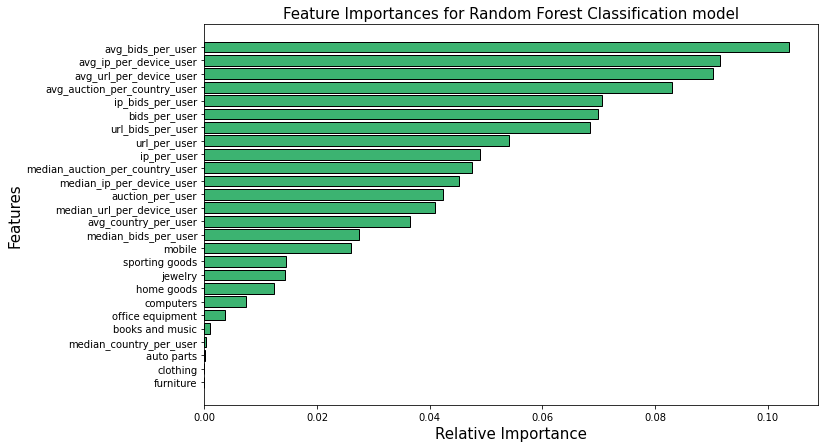

In [30]:
#Visual comparison
plt.figure(figsize=(11,7))
_= plt.barh(rf_df['Feature Names'], rf_df['Importance'], align='center', color='mediumseagreen', edgecolor='k')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.title('Feature Importances for Random Forest Classification model', fontsize=15)
plt.show()

---------------

# 3. Decision Tree Classifier 

- Model 1

In [31]:
# instantiate decision tree classifier
entr_model = tree.DecisionTreeClassifier(criterion='entropy', random_state = 1234)

# Call fit() on entr_model, and pass in X_train and y_train, in that order 
entr_model.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test)

# Assign y_pred the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred)

# Check out entr_model
entr_model

DecisionTreeClassifier(criterion='entropy', random_state=1234)

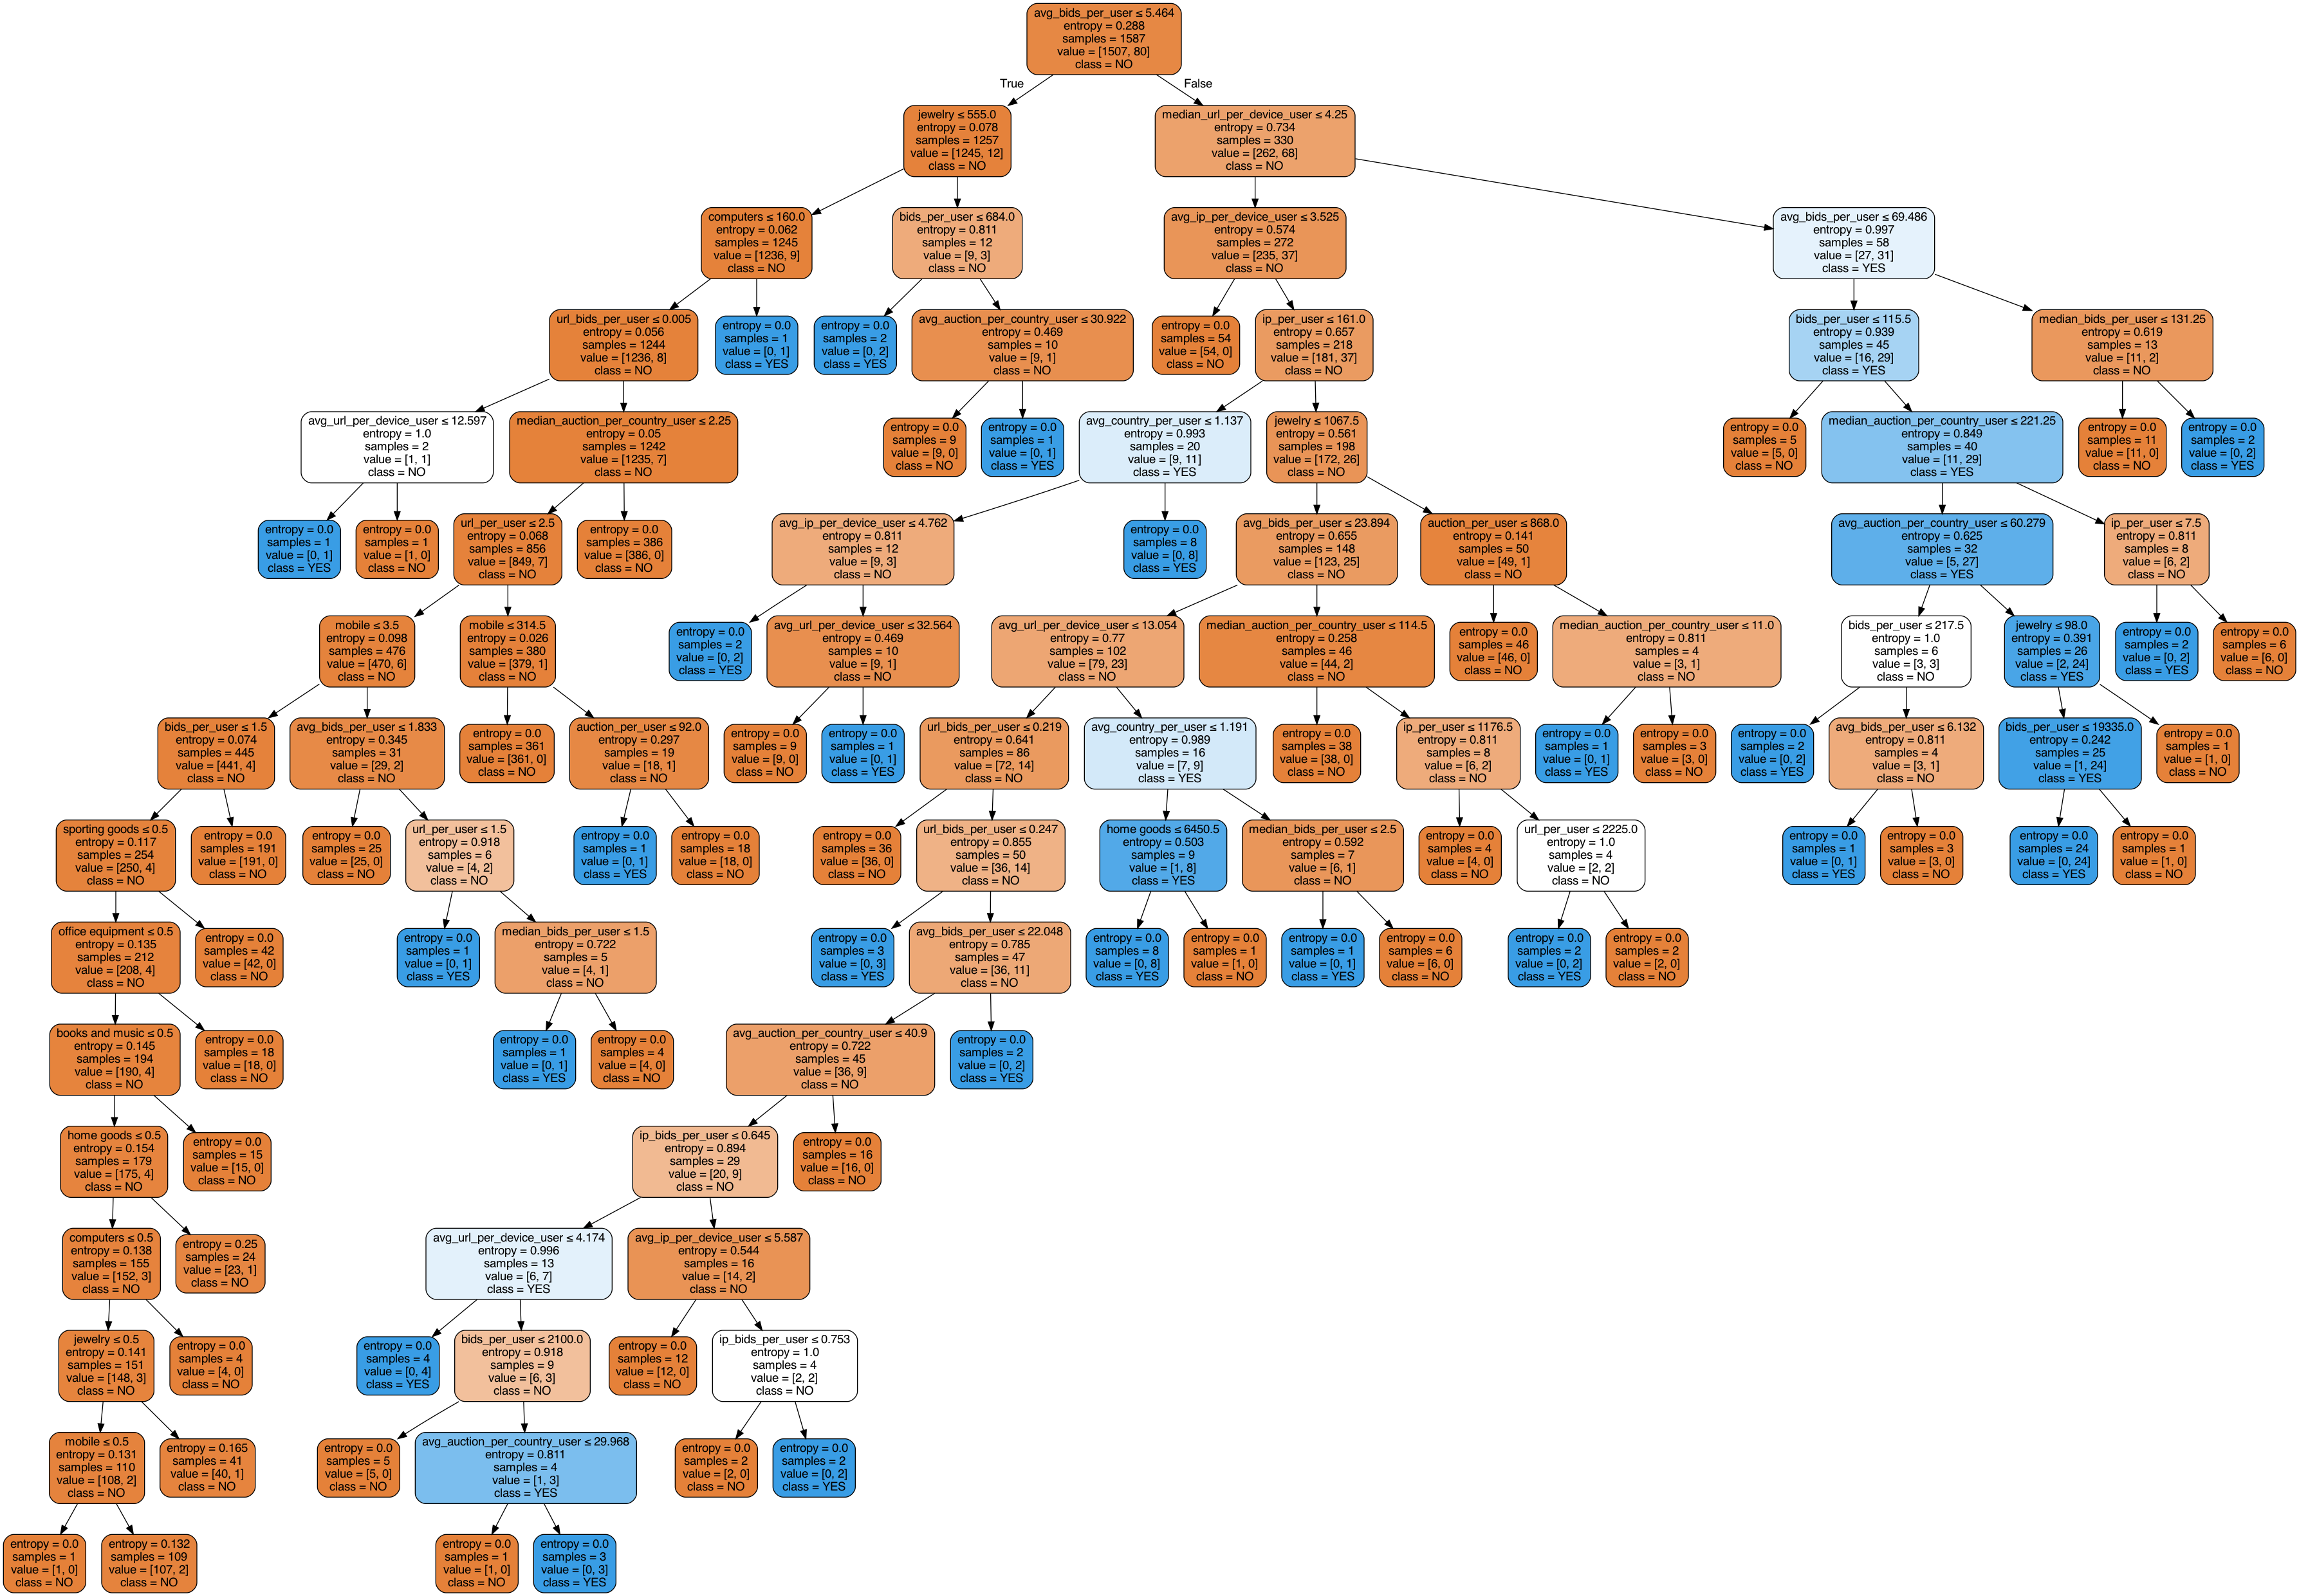

In [32]:
import pydotplus
from IPython.display import Image  

# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(entr_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [33]:
# evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for 1.0' , metrics.precision_score(y_test,y_pred, pos_label = 1.0))
print('Precision score for 0.0' , metrics.precision_score(y_test,y_pred, pos_label = 0.0))
print('Recall score for 1.0' , metrics.recall_score(y_test,y_pred, pos_label = 1.0))
print('Recall score for 0.0' , metrics.recall_score(y_test,y_pred, pos_label = 0.0))


Model Entropy - no max depth
Accuracy: 0.929471032745592
Balanced accuracy: 0.5545222041385724
Precision score for 1.0 0.2727272727272727
Precision score for 0.0 0.9481865284974094
Recall score for 1.0 0.13043478260869565
Recall score for 0.0 0.9786096256684492


In [34]:
# extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  366
False Positives:  8
False Negatives:  20
True Positives:  3


- Model 2

In [35]:
# Make a variable called gini_model, and assign it exactly what you assigned entr_model with above, but with the
# criterion changed to 'gini'
gini_model = tree.DecisionTreeClassifier(criterion='gini', random_state = 1234)

# Call fit() on the gini_model as you did with the entr_model
gini_model.fit(X_train, y_train)

# Call predict() on the gini_model as you did with the entr_model 
y_pred = gini_model.predict(X_test)

# Turn y_pred into a series, as before
y_pred = pd.Series(y_pred)

# Check out gini_model
gini_model

DecisionTreeClassifier(random_state=1234)

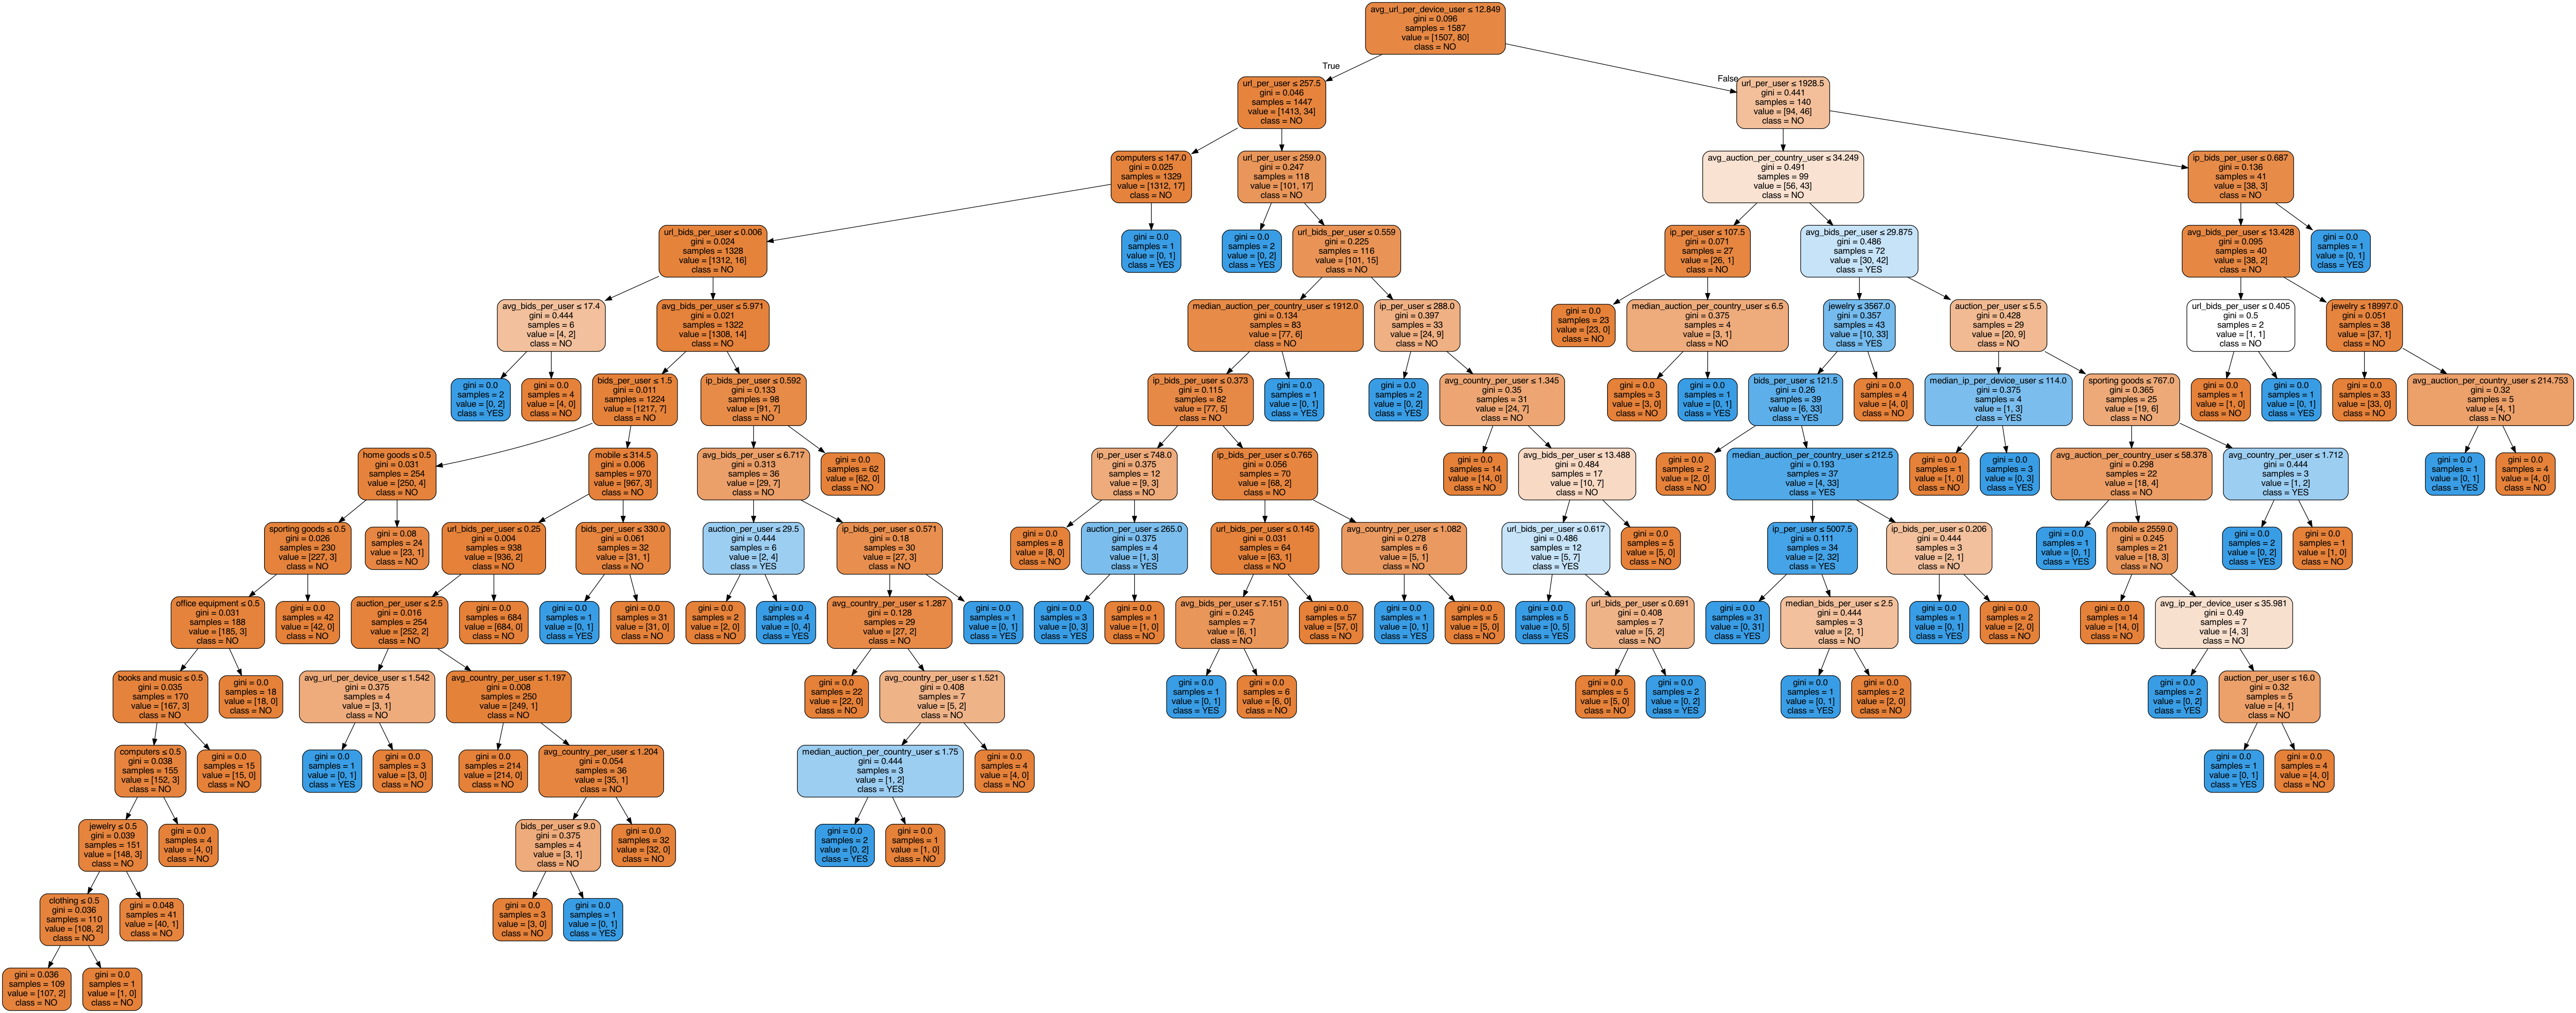

In [36]:
# As before, but make the model name gini_model
dot_data = StringIO()
tree.export_graphviz(gini_model , out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])

# Alternatively for class_names use gini_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [37]:
# model evaluation
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1.0))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0.0))

Model Gini impurity model
Accuracy: 0.9319899244332494
Balanced accuracy: 0.576261334573355
Precision score 0.3333333333333333
Recall score 0.9786096256684492


In [38]:
# extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  366
False Positives:  8
False Negatives:  19
True Positives:  4


- Model 3

In [39]:
# Made a model as before, but call it entr_model2, and make the max_depth parameter equal to 3. 
# Execute the fitting, predicting, and Series operations as before
entr_model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 1234)

entr_model2.fit(X_train, y_train)

y_pred = entr_model2.predict(X_test)

y_pred = pd.Series(y_pred)

entr_model2

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1234)

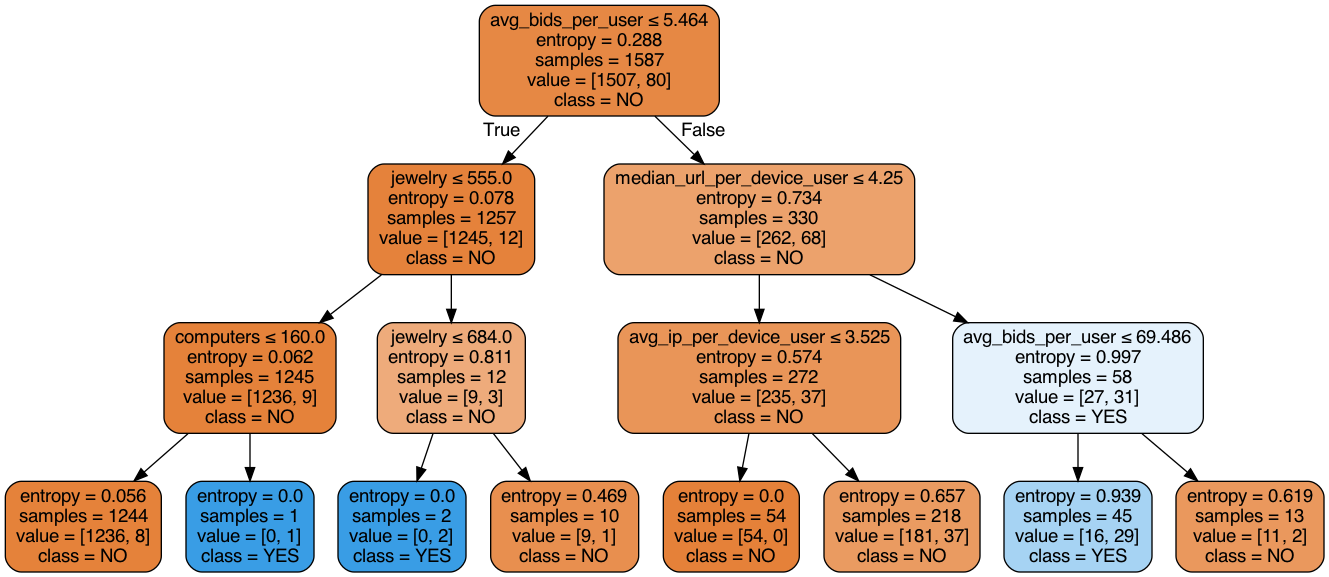

In [40]:
# As before, we need to visualize the tree to grasp its nature
dot_data = StringIO()
tree.export_graphviz(entr_model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])

# Alternatively for class_names use entr_model2.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [41]:
# model evaluation 
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for 1.0' , metrics.precision_score(y_test,y_pred, pos_label = 1.0))
print('Recall score for 0.0' , metrics.recall_score(y_test,y_pred, pos_label = 0.0))

Model Entropy model max depth 3
Accuracy: 0.9319899244332494
Balanced accuracy: 0.6170657986514764
Precision score for 1.0 0.375
Recall score for 0.0 0.9732620320855615


In [42]:
# extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  364
False Positives:  10
False Negatives:  17
True Positives:  6


- Model 4


### Best Performing Model


Considering the most important metrics for this case, this decision tree classifier model is returning the best results. I write in more details about the criteria in the Evaluation and Conclusion session below. But, in summary this model has high Recall score of .98 - It has identified correctly the highest number of 'robots' and it's keeping false positives ('humans' classified as 'robots') low.

In [43]:
# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3
gini_model2 = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 1234, max_depth  = 3)

# Do the fit, predict, and series transformations as before. 
gini_model2.fit(X_train, y_train)

y_pred = gini_model2.predict(X_test)

y_pred = pd.Series(y_pred)

gini_model2

DecisionTreeClassifier(max_depth=3, random_state=1234)

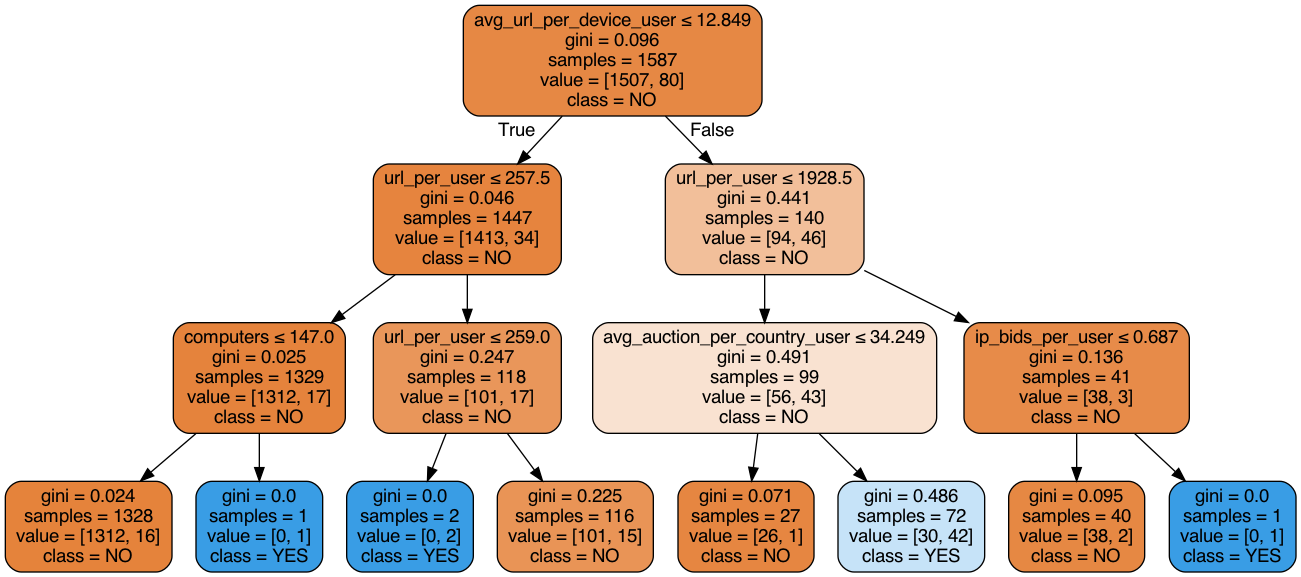

In [44]:
dot_data = StringIO()
tree.export_graphviz(gini_model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])

# Alternatively for class_names use gini_model2.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [45]:
# model evaluation
print("Gini impurity  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1.0))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0.0))

Gini impurity  model - max depth 3
Accuracy: 0.9420654911838791
Balanced accuracy: 0.6632178563124855
Precision score 0.5
Recall score 0.9786096256684492


In [46]:
# extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  366
False Positives:  8
False Negatives:  15
True Positives:  8


**NOTE:** The initial assumption about the Random Forest Classifier did not necessarily hold, because in classification problems it's not just accuracy that matters. In fact, rarely we'll be evaluating a classification model only on accuracy.

### Feature importance of the best performing Decision Tree Classifier

In [47]:
# create feature importance
tree_df = pd.DataFrame({'Feature Names': X.columns, 'Importance': entr_model2.feature_importances_})
tree_df = tree_df.sort_values(by='Importance', ascending=True)
tree_df.reset_index(inplace=True)
tree_df.tail(20)


,index,Feature Names,Importance
6,16,auto parts,0.000000
7,15,median_ip_per_device_user,0.000000
8,24,office equipment,0.000000
9,11,median_auction_per_country_user,0.000000
10,12,avg_url_per_device_user,0.000000
11,9,median_country_per_user,0.000000
12,8,avg_country_per_user,0.000000
13,7,median_bids_per_user,0.000000
14,5,ip_per_user,0.000000
15,4,auction_per_user,0.000000


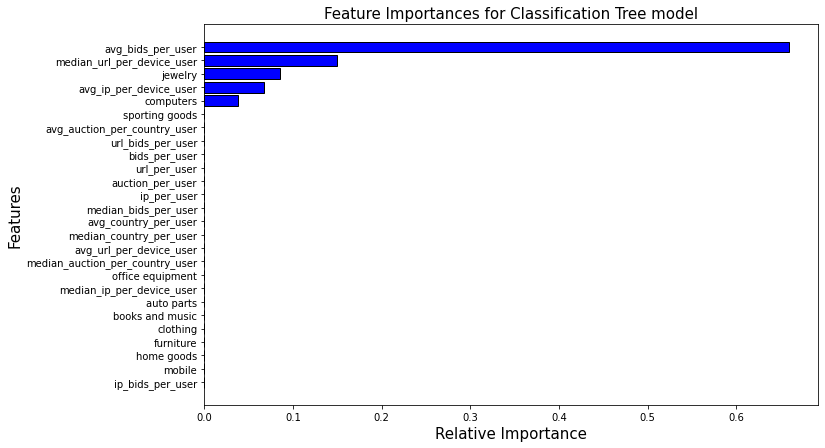

In [48]:
# Visual comparison:
plt.figure(figsize=(11,7))
_= plt.barh(tree_df['Feature Names'], tree_df['Importance'], align='center', color='blue', edgecolor='k')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.title('Feature Importances for Classification Tree model', fontsize=15)
plt.show()

------------

### ROC Curve

In [49]:
# Data preprocesses
def prep(raw_features, exclude=[]):
    prep_features = pd.DataFrame()
    # Listing the columns
    numerical = list(raw_features.columns)
    for e in exclude:
        try:
            numerical.remove(e)
        except:
            print('Removing name %s not in the feature set.'%e)
    # Data preprocessed by log transformation
    prep_features[numerical] = raw_features[numerical].apply(lambda x:np.log(x+1e-5))
    # Data preprocessed by MinMaxScaler
    scalar = MinMaxScaler()
    prep_features[numerical] = scalar.fit_transform(raw_features[numerical])
    return prep_features

In [50]:
prep_features_train = prep(X)

In [51]:
def model_compare(models, feature_set, label_set, model_names, colors, kfold = 10):
    from matplotlib.pylab import rcParams
    
    rcParams['figure.figsize'] = 12,12
    for model in models:
        model_name = model_names[models.index(model)]
        color = colors[models.index(model)]
        cv = StratifiedKFold(n_splits = kfold)
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)
        i=0
        
        for train, val in cv.split(feature_set,label_set):
            probas_= model.fit(feature_set.iloc[train], label_set.iloc[train].values.ravel()).predict_proba(feature_set.iloc[val])
            
            #compute ROC curve and AUC
            fpr,tpr,threshold = roc_curve(label_set.iloc[val].values.ravel(),probas_[:,1])
            tprs.append(interp(mean_fpr,fpr,tpr))
            tprs[-1][0] = 0.0
            roc_auc = auc(fpr,tpr)
            aucs.append(roc_auc)
            i +=1

        mean_tpr = np.mean(tprs,axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr,mean_tpr)
        std_auc = np.std(aucs)
        plt.plot(mean_fpr, mean_tpr, color=color,
             label = r'Mean ROC (AUC = %0.2f $\pm$ %0.2f) %s' % (mean_auc, std_auc,model_name),
             lw = 2, alpha =.8)

        std_tpr = np.std(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color=color, alpha=.2,
                     label = r'$\pm$ 1 std. dev. %s'%(model_name))
    
    plt.plot([0,1],[0,1],linestyle='--',lw=2,color='r',label='Luck',alpha=0.8)
    plt.legend(loc ='lower right',fontsize=20)


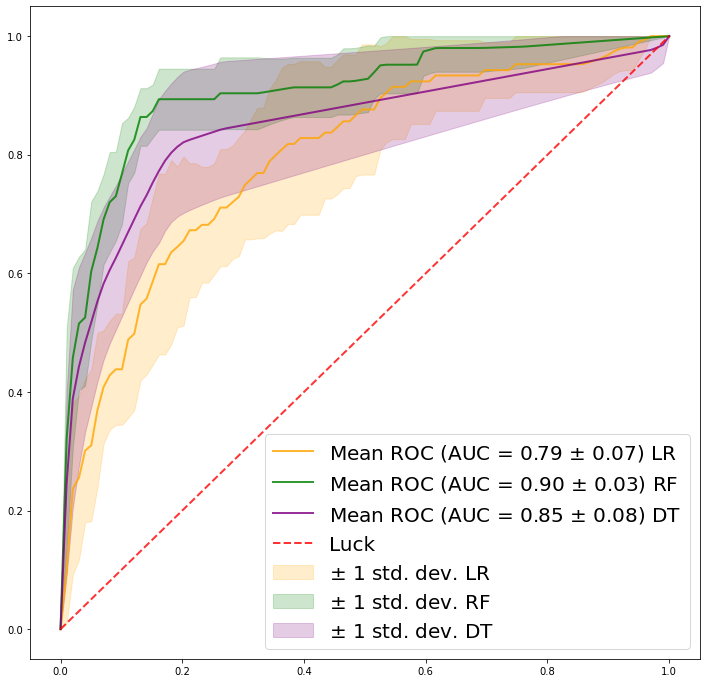

In [52]:
classifier1 = LogisticRegression(random_state=0, solver="liblinear")
classifier2 = RandomForestClassifier(n_estimators=600, max_depth=15, min_samples_leaf=2)
classifier3 = DecisionTreeClassifier(criterion = 'gini', random_state = 1234, max_depth  = 3)


classifiers = [classifier1, classifier2, classifier3]
model_names = ['LR','RF','DT']
colors = ['orange','green','purple']

model_compare(classifiers, prep_features_train, y, model_names, colors)

---------------

## Evaluation and Conclusion

**Accuracy:** It's not the best metric for the case here. Our target variable (robot or human) is not balanced - the data is skewed. So, we want to consider metrics like Precision, Recall, and F scoe.

First though, let's have a better understanding of the terms that form the basis for these.

- **True Positive:** label predicted 'robot' and it is in fact 'robot' (predicted 1.0 and it's 1.0).

- **True Negative:** label was predicted 'human' and it is in fact 'human' (predicted 0.0 and it's 0.0).

- **False Positive:** label was predicted 'robot' but it is in fact 'human' (predicted 1.0 but it's 0.0). Type 1 error or incorrect rejection of Null Hypothesis.

- **False Negative:** label was predicted 'human' but it is in fact 'robot' (predicted 0.0 but it's 1.0). Type 2 error or failure to reject of Null Hypothesis.

What are the best metrics to evaluate our model?

**Precision:** ability of the model to return only relevant instances. In this case, we want to minimize false positives -- I don't want 'robots' to be classified as 'humans'. 

**Recall:** ability of the model to identify all relevant instances, True Positive Rate, aka Sensitivity. I want the least false negatives -- I don't want 'humans' classified as 'robots'.

I believe both measures to be equally important in this case. Our model should be correctly identifying 'robots' as 'robots' -- High True Positive. And, we want to minimize 'humans' being classified as 'robots' -- We want to avoid False Positive or have low rate.

In summary, we want a model that return a high value for True positive and a low value for False positive. In case we can't achieve both, the goal will be to correctly identify robots. We are interested in models with High Recall.

**F1 Measure:** returns a harmonic mean of precision and recall -- indicates a balance between Precision & Recall. Therefore, a model that has a high F1 score is also a good model for us.

We can also evaluate the model through the ROC curve, which measures the entire two-dimensional area underneath the curve -- it the plot of ‘True Positive Rate’ (Sensitivity/Recall) against the ‘False Positive Rate’ (1-Specificity) at different classification thresholds.

NOTE: In the case of fraud detection as it the problem we are addressing here, we may wish Recall to be higher, so Frauds can be correctly classified/identified even if we missclassify some of the non-fraudulent activity as Fraud, it won’t cause any significant damage.

-------